In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Artificial Neurons: 
Uses a decision function, sigma of (z), to determine whether the input z belongs in class 0 or 1.

z is actually defined as a dot product between a weights vector, W, and a inputs vector, X. 

If z is bigger than some threshold value T, then z is classified as class 0. Otherwise, z is classified into class 1.

In [40]:
# Simple Implementation

class ArtificialNeuron:
  """
  All matrices/vectors that interact with this class must be a numpy array.
  
  Implementation of an artificial neuron
  """
  def __init__(self, W, T):
    self.weights = W
    self.threshold = T
  
  def __init__(self, num, T):
    self.weights = np.random.rand(num)
    self.threshold = T
  
  def classify(self, inputs):
    """
    Returns if the dot product between the weights and the inputs is greater than the threshold value.
    """
    assert inputs.shape == self.weights.shape, "Inputs does not match weights shape"
    z = np.dot(self.weights, inputs)
    if z >= self.threshold:
      return 1
    else:
      return 0

# Testing our code out
neuron = ArtificialNeuron(np.array(2), 0.8)
print("neuron output on (-2,2):", neuron.classify(np.array([-2,2])))
    
  


neuron output on (-2,2): 0


# Development of the Perceptron
Note that, if we were to take the threshold value and subtract it from the dot product between the weights and the input vector, we could then simply see if the difference is greater than 0.

This idea leads to the concept of biases, and ultimately lands us in Perceptron land. Take a look at my implementation of the Perceptron, heavily derived from the Artificial Neuron class.

## train

In [2]:
# Simple Implementation

class Perceptron:
  """
  All matrices/vectors that interact with this class must be a numpy array.
  
  Implementation of the Perceptron Algorithm for binary class labels. In other
  words, each sample is either one class label, represented as a 1, or another
  class label, represented as a 0.
  """
  
  def __init__(self, alpha):
    """Randomly initializes weights and sets bias to 0. You must specify the 
    size of the weights vector (which should match the size of each training 
    sample). You also must choose the learning rate"""
    self.bias = 0
    self.learning_rate = alpha
    self.weights = None
    self.current_errors = []
    self.cumulative_errors = []
  
  def classify(self, inputs):
    """
    Returns if the dot product between the weights and the inputs is greater than the threshold value.
    """
    assert inputs.shape == self.weights.shape, "Inputs does not match weights shape"
    z = np.dot(self.weights, inputs)
    if z + self.bias >= 0:
      return 1
    else:
      return 0
  
  def train_better(self, X, y, epochs=None):
    """
    This method is identical to the self.train(...) method, except for the 
    fact that epochs does not need to be specified. If epochs are not specified,
    then the algorithm will run until convergence (until the loss from the algorithm
    is 0 - until the algorithm makes no mistakes on any training input). This
    method thus assumes that the data clusters are linearly separable.

    This method expects n individual training data samples, and uses them
    to perform weight and bias updates. 

    The shape of each individual sample in the training dataset should match 
    the shape of our weights vector.

    The parameter X - inputs -  should have a shape (n,m), where n is the 
    number of training samples, and m is the number of dimensions each 
    training sample has

    The parameter Y - labels - should have a shape (n,), where n is the number
    of labels (each label corresponds to the training sample in X with the 
    matching index)
    """
    
    # for-loop implementation
    
    if epochs is not None:
      self.train(X,y,epochs)
    else:
      self.weights = np.random.rand(X.shape[1])
      self.bias = 0
      current_epoch_index = 0
      while True:
        current_epoch_error_count = 0
        for input_value, true_label in zip(X,y):
          perceptron_output = np.dot(self.weights, input_value) + self.bias
          predicted_label = None
          if perceptron_output >= 0:
            predicted_label = 1
          else:
            predicted_label = 0
          label_difference = true_label - predicted_label
          current_epoch_error_count += label_difference
          common_weight_bias_update_factor = self.learning_rate * label_difference
          weight_update = common_weight_bias_update_factor * input_value
          bias_update = common_weight_bias_update_factor
          self.weights = self.weights + weight_update
          self.bias = self.bias + bias_update
        if current_epoch_error_count == 0:
          break
        current_epoch_index += 1
      print("Current Epoch", current_epoch_index)


  
  def train(self, X, y, epochs):
    """
    This method expects n individual training data samples, and uses them
    to perform weight and bias updates. 

    The shape of each individual sample in the training dataset should match 
    the shape of our weights vector.

    The parameter X - inputs -  should have a shape (n,m), where n is the 
    number of training samples, and m is the number of dimensions each 
    training sample has

    The parameter Y - labels - should have a shape (n,), where n is the number
    of labels (each label corresponds to the training sample in X with the 
    matching index)
    """
    
    # for-loop implementation
    self.current_errors = []
    self.cumulative_errors = []
    self.weights = np.random.rand(X.shape[1])
    self.bias = 0
    error_logging_determiner_value = (epochs // (100))+1
    cumulative_error_count = 0
    for epoch_idx in range(epochs):
      current_error_count = 0
      for input_value, true_label in zip(X, y):
        perceptron_output = np.dot(self.weights, input_value) + self.bias
        predicted_label = None
        #print("what is the output:", perceptron_output)
        if perceptron_output >= 0:
          predicted_label = 1
        else:
          predicted_label = 0
        current_error_count += np.abs(true_label - predicted_label)
        #print(current_error_count)
        cumulative_error_count += current_error_count
        #print(true_label, predicted_label)
        #print("cumu",cumulative_error_count)
        learning_rate_times_label_delta = self.learning_rate * (true_label - predicted_label)
        weight_update = learning_rate_times_label_delta * input_value
        bias_update = learning_rate_times_label_delta

        self.weights = self.weights + weight_update
        self.bias = self.bias + bias_update
        if (epoch_idx % error_logging_determiner_value == 0):
          self.current_errors.append(current_error_count.item())
          self.cumulative_errors.append(cumulative_error_count.item())
        #print("bwha?",current_error_count)
    print("Errors every (epoch/100)th full batch \
          iteration", self.current_errors)
    print("Cumulative errors, logged every (epoch/100)th \
          full batch iteration", self.cumulative_errors)
      
      
    
  def get_weights_and_bias(self):
    """Returns weights and bias as a tuple"""
    return (self.weights, self.bias)
    
  
  

In [3]:
# Testing our perceptron algorithm implementation
perceptron = Perceptron(0.01)
print(perceptron.get_weights_and_bias())

(None, 0)


# Processing our data
Let's now take the time to process our dataset. We are using the iris dataset. 
I have listed the file, iris.data, in datasets folder.

### DATASET PROCESSING STILL IN DEVELOPMENT

In [4]:
df = pd.read_csv("datasets/iris.data",header=None)
setosa = df.iloc[0:50, [0,3,4]].values # get sepal length [column index 0] and 
                                       # petal width [column index 3] of setosa
virginica = df.iloc[100:, [0,3,4]].values # get sepal length [column index 0] 
                                          # and petal width [column index 3] of virginica
combined_set_no_label_conversion = np.concatenate((setosa,virginica))
combined_set_no_label_conversion[combined_set_no_label_conversion[:,2]=="Iris-setosa",2] = 0
combined_set_no_label_conversion[combined_set_no_label_conversion[:,2]=="Iris-virginica",2] = 1
print("combined", combined_set_no_label_conversion)
#print("setosa", setosa)
#print("virginica", virginica)
combined_set = combined_set_no_label_conversion
y = combined_set[:,2]
X = combined_set[:,[0,1]]
#plt.scatter(X[:50,0],X[:50,1],color="green",label="Setosa")
#plt.scatter(X[50:,0],X[50:,1],color="purple",label="Virginica")
#plt.legend()
#plt.show()

combined [[5.1 0.2 0]
 [4.9 0.2 0]
 [4.7 0.2 0]
 [4.6 0.2 0]
 [5.0 0.2 0]
 [5.4 0.4 0]
 [4.6 0.3 0]
 [5.0 0.2 0]
 [4.4 0.2 0]
 [4.9 0.1 0]
 [5.4 0.2 0]
 [4.8 0.2 0]
 [4.8 0.1 0]
 [4.3 0.1 0]
 [5.8 0.2 0]
 [5.7 0.4 0]
 [5.4 0.4 0]
 [5.1 0.3 0]
 [5.7 0.3 0]
 [5.1 0.3 0]
 [5.4 0.2 0]
 [5.1 0.4 0]
 [4.6 0.2 0]
 [5.1 0.5 0]
 [4.8 0.2 0]
 [5.0 0.2 0]
 [5.0 0.4 0]
 [5.2 0.2 0]
 [5.2 0.2 0]
 [4.7 0.2 0]
 [4.8 0.2 0]
 [5.4 0.4 0]
 [5.2 0.1 0]
 [5.5 0.2 0]
 [4.9 0.1 0]
 [5.0 0.2 0]
 [5.5 0.2 0]
 [4.9 0.1 0]
 [4.4 0.2 0]
 [5.1 0.2 0]
 [5.0 0.3 0]
 [4.5 0.3 0]
 [4.4 0.2 0]
 [5.0 0.6 0]
 [5.1 0.4 0]
 [4.8 0.3 0]
 [5.1 0.2 0]
 [4.6 0.2 0]
 [5.3 0.2 0]
 [5.0 0.2 0]
 [6.3 2.5 1]
 [5.8 1.9 1]
 [7.1 2.1 1]
 [6.3 1.8 1]
 [6.5 2.2 1]
 [7.6 2.1 1]
 [4.9 1.7 1]
 [7.3 1.8 1]
 [6.7 1.8 1]
 [7.2 2.5 1]
 [6.5 2.0 1]
 [6.4 1.9 1]
 [6.8 2.1 1]
 [5.7 2.0 1]
 [5.8 2.4 1]
 [6.4 2.3 1]
 [6.5 1.8 1]
 [7.7 2.2 1]
 [7.7 2.3 1]
 [6.0 1.5 1]
 [6.9 2.3 1]
 [5.6 2.0 1]
 [7.7 2.0 1]
 [6.3 1.8 1]
 [6.7 2.1 1]
 [7.2 1.8 1]
 [6

We have plotted the setosa and virginica data points, with sepal length and 
width as their features. Let's train our perceptron model on our data, with 
randomly initialized weights (with two components) and a learning rate of 0.01.

Current Epoch 1


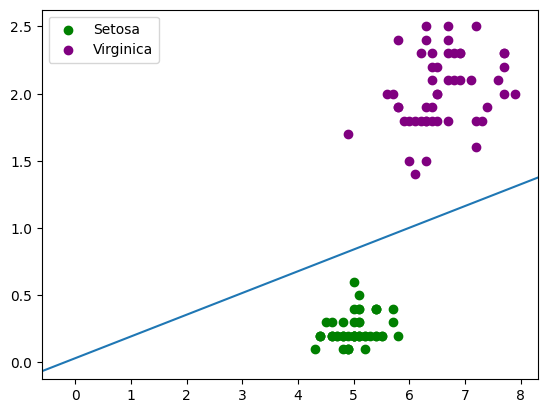

1

In [8]:
perceptron_flower_distinction = Perceptron(0.01)
perceptron_flower_distinction.train_better(X,y)
weights,bias = perceptron_flower_distinction.get_weights_and_bias()

slope = -1/(weights[1]/weights[0])
y_intercept = (0.0,-bias)
plt.scatter(X[:50,0],X[:50,1],color="green",label="Setosa")
plt.scatter(X[50:,0],X[50:,1],color="purple",label="Virginica")
plt.axline((0,-bias/weights[1]), (-bias/weights[0],0))
plt.legend()
plt.show()
perceptron_flower_distinction.classify(np.array([5,1]))


# Discoveries about Perceptrons - [COMPLETED]
It seems that I thought perceptrons would maximize the difference between clusters that belong to different groups. I was wrong about that. They do not. As long as
a hyperplane decision boundary is found that separates two groups of clusters, 
the perceptron will say "it's good". I think I like SVMs more now, because of 
the fact that they maximize the distance between groups. I notice that, due to 
the fact that Perceptrons are okay with the first decision boundary that linearly
separates two groups, that we might get bad performace. For instance, a point closer to the Setosa group (label 0) might actually be classified as Virginica 
(label 1), because the decision boundary, while separating the two groups of
points, is very close to the Setosa group.

Furthermore, I have not quite figured out how to get the decision boundary from
the weights vector and bias value. I also want to add an option to have the 
perceptron terminate via convergence, by making eopchs an optional parameter with
default value None, to see if that changes performance.

I have completed my inquiries into Perceptrons. I hope to know implement Adaline
alongside full batch gradient descent, stochastic gradient descent, and mini-batch
gradient descent. I want to look at the differences between Adaline and Perceptron
through how Adaline uses activation functions.  

In [32]:
class Adaline:
  """
  All matrices/vectors that interact with this class must be a numpy array.
  
  Implementation of the Adaline Algorithm for binary class labels. In other
  words, each sample is either one class label, represented as a 1, or another
  class label, represented as a 0.
  """
  
  def __init__(self, alpha):
    """Randomly initializes weights and sets bias to 0. You must specify the 
    size of the weights vector (which should match the size of each training 
    sample). You also must choose the learning rate"""
    self.bias = 0
    self.learning_rate = alpha
    self.weights = None
    self.current_errors = []
    self.cumulative_errors = []
  
  def classify(self, inputs):
    """
    Returns if the dot product between the weights and the inputs is greater than the threshold value.
    """
    assert inputs.shape == self.weights.shape, "Inputs does not match weights shape"
    z = np.dot(self.weights, inputs)
    if z + self.bias >= 0:
      return 1
    else:
      return 0
  
  def activation(self, X):
    """
    The activation function for this ML Algorithm
    """
    return X
  
  def train_SGD_shuffle(self, X, y, epochs, shuffle=False):
    """
    This method is identical to the self.train(...) method, except for the 
    fact that . If epochs are not specified,
    then the algorithm will run until convergence (until the loss from the algorithm
    is 0 - until the algorithm makes no mistakes on any training input). This
    method thus assumes that the data clusters are linearly separable.

    This method expects n individual training data samples, and uses them
    to perform weight and bias updates. 

    The shape of each individual sample in the training dataset should match 
    the shape of our weights vector.

    The parameter X - inputs -  should have a shape (n,m), where n is the 
    number of training samples, and m is the number of dimensions each 
    training sample has

    The parameter Y - labels - should have a shape (n,), where n is the number
    of labels (each label corresponds to the training sample in X with the 
    matching index)
    """
    
    # for-loop implementation
    
    if shuffle == False:
      """
      This method expects n individual training data samples, and uses them
      to perform weight and bias updates. 

      The shape of each individual sample in the training dataset should match 
      the shape of our weights vector.

      The parameter X - inputs -  should have a shape (n,m), where n is the 
      number of training samples, and m is the number of dimensions each 
      training sample has

      The parameter Y - labels - should have a shape (n,), where n is the number
      of labels (each label corresponds to the training sample in X with the 
      matching index)
      """
      
      # for-loop implementation
      self.current_errors = []
      self.cumulative_errors = []
      self.weights = np.random.rand(X.shape[1])
      self.bias = 0
      error_logging_determiner_value = (epochs // (100))+1
      cumulative_error_count = 0
      for epoch_idx in range(epochs):
        current_error_count = 0
        for input_value, true_label in zip(X, y):
          adaline_output = np.dot(self.weights, input_value) + self.bias
          adaline_output = self.activation(adaline_output)
          predicted_label = None
          #print("what is the output:", perceptron_output)
          if adaline_output >= 0:
            predicted_label = 1
          else:
            predicted_label = 0
          current_error_count += np.abs(true_label - predicted_label)
          #print(current_error_count)
          cumulative_error_count += current_error_count
          #print(true_label, predicted_label)
          #print("cumu",cumulative_error_count)
          learning_rate_times_label_delta = self.learning_rate * (true_label - predicted_label)
          weight_update = learning_rate_times_label_delta * input_value
          bias_update = learning_rate_times_label_delta

          # since the weights and bias are being updated after every epoch is finished,
          # this is an example of full batch gradient descent.
          self.weights = self.weights + weight_update
          self.bias = self.bias + bias_update

          if (epoch_idx % error_logging_determiner_value == 0):
            self.current_errors.append(current_error_count.item())
            self.cumulative_errors.append(cumulative_error_count.item())
        
          #print("bwha?",current_error_count)
      print("Errors every (epoch/100)th full batch \
            iteration", self.current_errors)
      print("Cumulative errors, logged every (epoch/100)th \
            full batch iteration", self.cumulative_errors)
    else:
      # here, randomize the training dataset and train your model on the randomized
      # full batch
      # for-loop implementation
      self.current_errors = []
      self.cumulative_errors = []
      self.weights = np.random.rand(X.shape[1])
      self.bias = 0
      error_logging_determiner_value = (epochs // (100))+1
      cumulative_error_count = 0
      for epoch_idx in range(epochs):
        # zip up X and y
        print("Yah")
        X_y = list(zip(X,y))
        # shuffle the X_y list in place
        random.shuffle(X_y)
        # split X and y back into their respective spots
        X,y = zip(*X_y)
        current_error_count = 0
        for input_value, true_label in zip(X, y):
          # net input function
          adaline_output = np.dot(self.weights, input_value) + self.bias
          # this activation function is a step we do not do in perceptron
          adaline_output = self.activation(adaline_output)
          predicted_label = None
          #print("what is the output:", perceptron_output)
          # threshold function to get our predicted label
          if adaline_output >= 0:
            predicted_label = 1
          else:
            predicted_label = 0
          current_error_count += np.abs(true_label - predicted_label)
          #print(current_error_count)
          cumulative_error_count += current_error_count
          #print(true_label, predicted_label)
          #print("cumu",cumulative_error_count)
          learning_rate_times_label_delta = self.learning_rate * (true_label - predicted_label)
          weight_update = learning_rate_times_label_delta * input_value
          bias_update = learning_rate_times_label_delta

          # since the weights and bias are being updated after every epoch is finished,
          # this is an example of full batch gradient descent.
          self.weights = self.weights + weight_update
          self.bias = self.bias + bias_update


  
  def train(self, X, y, epochs):
    """
    This method expects n individual training data samples, and uses them
    to perform weight and bias updates. 

    The shape of each individual sample in the training dataset should match 
    the shape of our weights vector.

    The parameter X - inputs -  should have a shape (n,m), where n is the 
    number of training samples, and m is the number of dimensions each 
    training sample has

    The parameter Y - labels - should have a shape (n,), where n is the number
    of labels (each label corresponds to the training sample in X with the 
    matching index)
    """
    
    # for-loop implementation
    self.current_errors = []
    self.cumulative_errors = []
    self.weights = np.random.rand(X.shape[1])
    self.bias = 0
    error_logging_determiner_value = (epochs // (100))+1
    cumulative_error_count = 0
    for epoch_idx in range(epochs):
      current_error_count = 0
      weight_update = 0
      bias_update = 0
      for input_value, true_label in zip(X, y):
        adaline_output = np.dot(self.weights, input_value) + self.bias
        adaline_output = self.activation(adaline_output)
        predicted_label = None
        #print("what is the output:", perceptron_output)
        if adaline_output >= 0:
          predicted_label = 1
        else:
          predicted_label = 0
        current_error_count += np.abs(true_label - predicted_label)
        #print(current_error_count)
        cumulative_error_count += current_error_count
        #print(true_label, predicted_label)
        #print("cumu",cumulative_error_count)
        learning_rate_times_label_delta = self.learning_rate * (true_label - predicted_label)
        weight_update += learning_rate_times_label_delta * input_value
        bias_update += learning_rate_times_label_delta

        
        if (epoch_idx % error_logging_determiner_value == 0):
          self.current_errors.append(current_error_count.item())
          self.cumulative_errors.append(cumulative_error_count.item())
      # since the weights and bias are being updated after every epoch is finished,
      # this is an example of full batch gradient descent.
      self.weights = self.weights + weight_update
      self.bias = self.bias + bias_update
        #print("bwha?",current_error_count)
    print("Errors every (epoch/100)th full batch \
          iteration", self.current_errors)
    print("Cumulative errors, logged every (epoch/100)th \
          full batch iteration", self.cumulative_errors)
      
      
    
  def get_weights_and_bias(self):
    """Returns weights and bias as a tuple"""
    return (self.weights, self.bias)
    

### ADALINE IN PROGRESS
It seems that Adaline updates its model parameters by taking the difference 
between the true input label and the model output passed into an activation function,
while Perceptron uses the difference between the model's predicted label and the
input's true label to update model parameters.

The Adaline train function first draft has been written, but I have not yet
tested it, so I cannot make any guarantees on if it works. However, the difference
between the Perceptron method and Adaline is that Perceptron features net input
function, then goes into threshold to get a class label, while Adaline throws the
input into a net input function, then there is an activation function, then there is 
a threshold function to get the predicted label of the current input.

Furthermore, the Perceptron method will accumulate weight and bias updates over
the entire training set before updating the weights and bias in one fell swoop,
reminiscent of full batch gradient descent.
In difference, the Adaline method will update the weights and bias after every training
example, thus implementing stochastic gradient descent. Additionally, the Adaline 
method has the option to shuffle the data.


# ADALINE is incredibly wrong
There exists a conceptual error in my implementation

Errors every (epoch/100)th full batch             iteration []
Cumulative errors, logged every (epoch/100)th             full batch iteration []
[0.16792113 0.81482189] 0


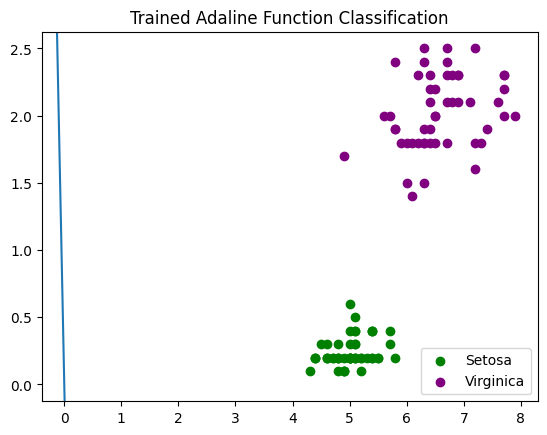

1

In [72]:
adaline_flower_distinction = Adaline(0.01)
adaline_flower_distinction.train_SGD_shuffle(X,y,0,False)
weights,bias = adaline_flower_distinction.get_weights_and_bias()
print(weights,bias)
slope = -1/(weights[1]/weights[0])
y_intercept = (0.0,-bias)
plt.scatter(X[:50,0],X[:50,1],color="green",label="Setosa")
plt.scatter(X[50:,0],X[50:,1],color="purple",label="Virginica")
plt.axline((0,-(bias+0.0000000001)/weights[1]), (-(bias+0.000000000001)/weights[0],0))
plt.legend()
plt.title("Trained Adaline Function Classification")
plt.show()
adaline_flower_distinction.classify(np.array([3,0]))